In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

# StudentPerformance_with_HParamter_GA_Tuning

Building a predictions modle with Deep Learning Approach with Tensorflow/Keras.

### Other Notebooks(in this learnign "series"):

1. [Genetic Algorithm with Python](https://github.com/mocha234/mocha234-DL-repo/blob/main/GeneticAlgorithm/GA_with_Python.ipynb) --> Understanding Genetic Algorithm with Python(without libraries)
2. [Predicting Student Performance(Empirically)](https://github.com/mocha234/mocha234-DL-repo/blob/main/GeneticAlgorithm/StudentPerformance_with_NN.ipynb) --> Empirically tune hyper-parameters
3. [Predicting Student Performance(SKLearn's GridSearchCV)](ww) --> Tune hyper-parameters with Sci-Kit Learn's GridSearchCV
4. [Predicting Student Performance(Genetic Algorithm with PyGAD)](https://github.com/mocha234/mocha234-DL-repo/blob/main/GeneticAlgorithm/StudentPerformance_PyGAD.ipynb) --> Tune hyper-parameters with GA using PyGAD
5. [Predicting Student Performance(Genetic Algorithm with Trained Model + PyGAD)](https://github.com/mocha234/mocha234-DL-repo/blob/main/GeneticAlgorithm/StudentPerformance_Tensorflow_PyGAD.ipynb) --> Tune GA hyper-parameters using PyGAD of a trained Model
6. [Some Findings, Comparison, Summary](https://github.com/mocha234/mocha234-DL-repo/blob/main/GeneticAlgorithm/GA_summary.ipynb) --> Summary of this learning "series"


***This Notebook*** 7. [Using GA to find the Best Hyperparameters](https://github.com/mocha234/mocha234-DL-repo/blob/main/GeneticAlgorithm/StudentPerformance_with_HParamter_GA_Tuning.ipynb) --> Using GA to find the Best Hyperparameters, encoding desire hyperparameter into gene in string of chromosome.

### Index

1. Dataset
2. Packages Needed
3. Data Preprocessing
4. Building Deep Learning Model with Tensorflow/Keras
5. Finding the best Hyperparameters with GA
5. Inference

# 1. Dataset

Source: https://archive.ics.uci.edu/ml/datasets/Student+Performance

References: 
- https://www.kaggle.com/terrifictitan12/student-performance-81-accuracy
- https://janakiev.com/blog/keras-iris/
- https://datascienceplus.com/keras-regression-based-neural-networks/

#### Description

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. 

Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). 

#### Note: In this notebook, I used the Dataset with Portuguese Language

In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. 

Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. 

This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd-period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details).

### Attribute Information:

### Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:

* 1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)* 
* 2 sex - student's sex (binary: 'F' - female or 'M' - male)
* 3 age - student's age (numeric: from 15 to 22)
* 4 address - student's home address type (binary: 'U' - urban or 'R' - rural)
* 5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
* 6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
* 7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
* 8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
* 9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* 10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* 11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
* 12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')
* 13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
* 14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
* 15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)
* 16 schoolsup - extra educational support (binary: yes or no)
* 17 famsup - family educational support (binary: yes or no)
* 18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
* 19 activities - extra-curricular activities (binary: yes or no)
* 20 nursery - attended nursery school (binary: yes or no)
* 21 higher - wants to take higher education (binary: yes or no)
* 22 internet - Internet access at home (binary: yes or no)
* 23 romantic - with a romantic relationship (binary: yes or no)
* 24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
* 25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)
* 26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)
* 27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
* 28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
* 29 health - current health status (numeric: from 1 - very bad to 5 - very good)
* 30 absences - number of school absences (numeric: from 0 to 93)

#### these grades are related with the course subject, Math or Portuguese:
* 31 G1 - first period grade (numeric: from 0 to 20)
* 31 G2 - second period grade (numeric: from 0 to 20)
* 32 G3 - final grade (numeric: from 0 to 20, output target)


# 2. Packages Needed

In [1]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow import convert_to_tensor
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

pd.set_option('display.max_columns', None)
np.set_printoptions(precision=15)
plt.rcParams["figure.figsize"] = (17, 6) # (w, h)
%matplotlib inline

# 3. Data Preprocessing

In [2]:
df = pd.read_csv("student-por.csv")
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10


In [3]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [4]:
# df.dtypes

In [5]:
# df.isnull().sum() 
# Check for missing data

In [6]:
features_list = list(df.columns)[:-1]
print("Features: {x}".format(x = features_list))
print("\nNumber of Features: {x}".format(x = len(features_list)))

Features: ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']

Number of Features: 32


In [7]:
# df.info()
# # Check datatype of features

In [8]:
features = df.drop(["G3"], axis = 1)
features

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11
645,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15
646,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12
647,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10


In [9]:
target = df.drop(features_list, axis = 1)
target

,G3
0,11
1,11
2,12
3,14
4,13
...,...
644,10
645,16
646,9
647,10


In [10]:
mapping_school = {'GP' : 0, 'MS' : 1}
mapping_sex = {'F' : 0, 'M' : 1}
mapping_address = {'U' : 0, 'R' : 1}
mapping_famsize = {'GT3' : 0, 'LE3' : 1}
mapping_pstatus = {'A' : 0, 'T' : 1}
mapping_mjob = {'at_home' : 0, 'health' : 1, 'other' : 2, 'services' : 3, 'teacher' : 4}
mapping_fjob = {'at_home' : 0, 'health' : 1, 'other' : 2, 'services' : 3, 'teacher' : 4}
mapping_reason = {'course' : 0, 'other' : 1, 'home' : 2, 'reputation' : 3}
mapping_guardian = {'mother' : 0, 'father' : 1, 'other': 2}
mapping_schoolsup = {'no' : 0, 'yes' : 1}
mapping_famsup = {'no' : 0, 'yes' : 1}
mapping_romantic = {'no' : 0, 'yes' : 1}
mapping_paid = {'no' : 0, 'yes' : 1}
mapping_activities = {'no' : 0, 'yes' : 1}
mapping_nursery = {'no' : 0, 'yes' : 1}
mapping_higher = {'no' : 0, 'yes' : 1}
mapping_internet = {'no' : 0, 'yes' : 1}

In [11]:
df['school'] = features['school'].map(mapping_school)
df['sex'] = features['sex'].map(mapping_sex)
df['address'] = features['address'].map(mapping_address)
df['famsize'] = features['famsize'].map(mapping_famsize)
df['Pstatus'] = features['Pstatus'].map(mapping_pstatus)
df['Mjob'] = features['Mjob'].map(mapping_mjob)
df['Fjob'] = features['Fjob'].map(mapping_fjob)
df['reason'] = features['reason'].map(mapping_reason)
df['guardian'] = features['guardian'].map(mapping_guardian).astype('Int64')
df['famsup'] = features['famsup'].map(mapping_famsup)
df['schoolsup'] = features['schoolsup'].map(mapping_schoolsup)
df['romantic'] = features['romantic'].map(mapping_romantic)
df['paid'] = features['paid'].map(mapping_paid)
df['activities'] = features['activities'].map(mapping_activities)
df['nursery'] = features['nursery'].map(mapping_nursery)
df['higher'] = features['higher'].map(mapping_higher)
df['internet'] = features['internet'].map(mapping_internet)

In [12]:
features

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11
645,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15
646,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12
647,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10


In [13]:
# features.dtypes

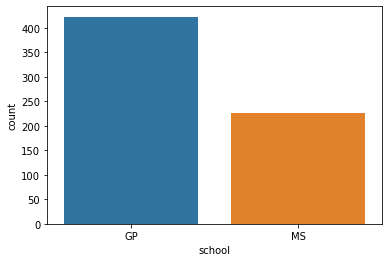

In [14]:
sns.countplot(x='school', data=features);

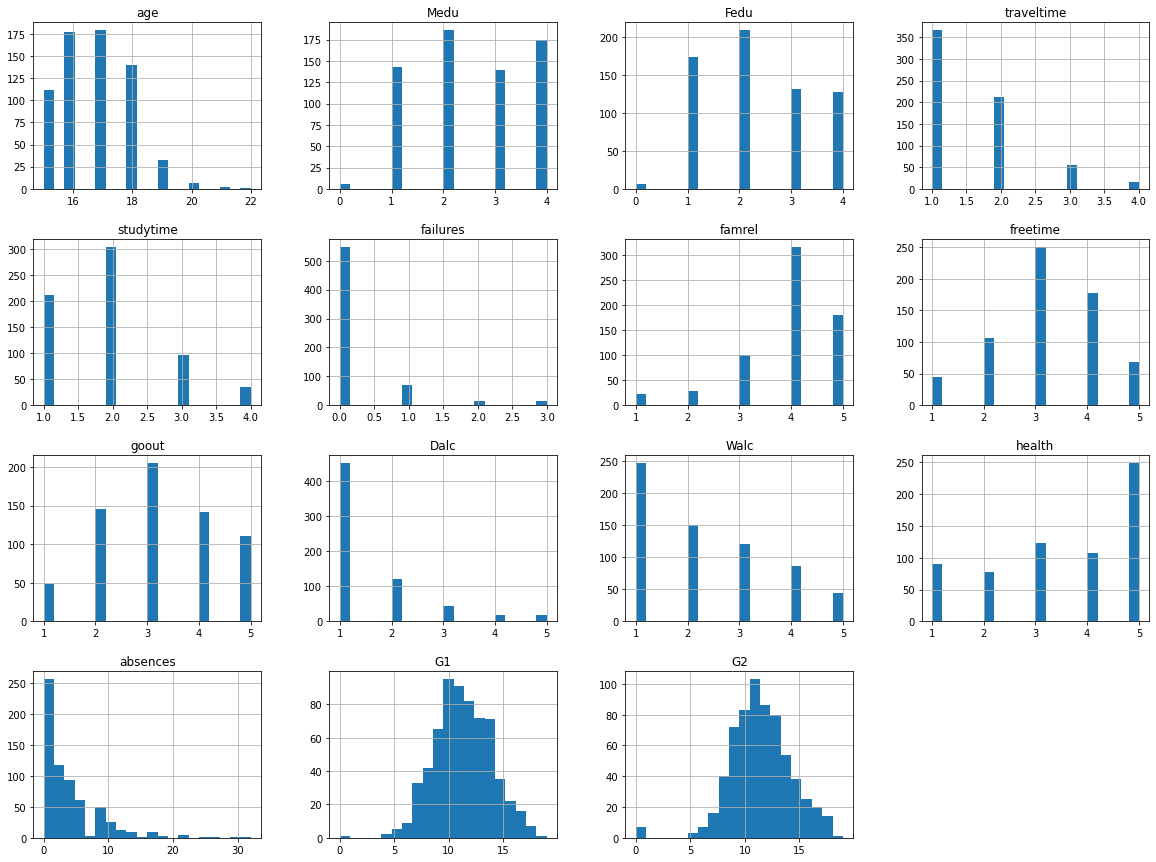

In [15]:
features.hist(bins=20, figsize=(20,15));

#### Outliers

As I go through the data, I found there are students who achieve 0 in their G3 depsite having more than half during their G1 & G2 examinations. 
The outliers might affect model's performance, hence I decided to drop those outliers.

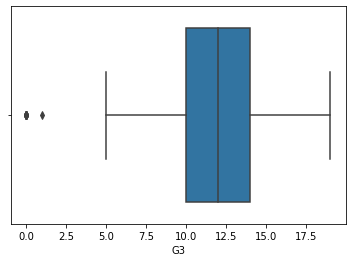

In [16]:
sns.boxplot(x=target["G3"]);

#### Drop Outliers data if certain requirement satisfied.

G3 with score of 2.5 and less considered as Outliers. To understand this data, I will list down these outliers.

In [17]:
df_outliers = df[df["G3"]<2.5]
df_outliers

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
163,0,1,18,0,1,1,1,1,2,2,0,0,1,1,2,0,0,0,0,1,0,1,1,2,3,5,2,5,4,0,11,9,0
172,0,1,16,0,0,1,3,3,2,3,0,1,1,2,1,0,1,0,0,1,1,1,1,4,5,5,4,4,5,0,10,10,1
440,1,1,16,0,0,1,1,1,0,3,2,0,2,2,0,0,1,0,1,1,1,0,1,5,4,5,4,5,3,0,7,0,0
519,1,1,16,1,0,1,2,1,2,3,3,0,2,2,0,0,0,0,1,1,1,1,0,5,2,1,1,1,2,0,8,7,0
563,1,1,17,0,0,1,2,2,2,2,0,0,1,1,1,0,0,0,1,1,1,0,1,1,2,1,2,3,5,0,7,0,0
567,1,1,18,1,0,1,3,2,3,2,0,0,1,1,1,0,0,0,0,1,0,1,0,2,3,1,2,2,5,0,4,0,0
583,1,0,18,1,0,1,2,2,2,2,1,0,2,1,1,0,0,0,0,1,0,1,1,5,5,5,1,1,3,0,8,6,0
586,1,0,17,0,0,1,4,2,4,3,2,0,1,2,0,1,1,0,1,1,1,1,0,5,5,5,1,3,5,0,8,8,0
597,1,0,18,1,0,1,2,2,0,2,0,0,3,2,1,0,0,0,1,1,1,0,1,4,3,3,1,1,4,0,9,0,0
603,1,0,18,1,1,0,4,2,4,2,3,0,1,2,0,0,0,0,1,1,1,1,1,5,3,1,1,1,5,0,5,0,0


#### Dropping rows if:

G3 considered as outliers when G1 or G2 above average.

In [18]:
outlier_idx = df[df["G3"] < 2.5].index
len(outlier_idx) 
df = df.drop(outlier_idx)
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,0,0,0,4,4,0,4,0,0,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,4,0,11,11
1,0,0,17,0,0,1,1,1,0,2,0,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2,9,11,11
2,0,0,15,0,1,1,1,1,0,2,1,0,1,2,0,1,0,0,0,1,1,1,0,4,3,2,2,3,3,6,12,13,12
3,0,0,15,0,0,1,4,2,1,3,2,0,1,3,0,0,1,0,1,1,1,1,1,3,2,2,1,1,5,0,14,14,14
4,0,0,16,0,0,1,3,3,2,2,2,1,1,2,0,0,1,0,0,1,1,0,0,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,19,1,0,1,2,3,3,2,0,0,1,3,1,0,0,0,1,0,1,1,0,5,4,2,1,2,5,4,10,11,10
645,1,0,18,0,1,1,3,1,4,3,0,0,1,2,0,0,1,0,0,1,1,1,0,4,3,4,1,1,1,4,15,15,16
646,1,0,18,0,0,1,1,1,2,2,0,0,2,2,0,0,0,0,1,1,1,0,0,1,1,1,1,1,5,6,11,12,9
647,1,1,17,0,1,1,3,1,3,3,0,0,2,1,0,0,0,0,0,0,1,1,0,2,4,5,3,4,2,6,10,10,10


### Reassign features and target dataframe after dropping outliers

In [19]:
target = df.drop(features_list, axis = 1)
features = df.drop(["G3"], axis = 1)

### Data Normalization

#### Split Training and Testing data

In [20]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3,random_state=11)

In [21]:
scaler = preprocessing.MinMaxScaler(feature_range = (0,1))
X_train_scaled = scaler.fit_transform(X_train)
y_train_scaled = scaler.fit_transform(y_train)
X_test_scaled = scaler.fit_transform(X_test)
y_test_scaled = scaler.fit_transform(y_test)

In [22]:
X_train_unscaled = scaler.inverse_transform(X_train_scaled).astype('float64') 
y_train_unscaled = scaler.inverse_transform(y_train_scaled).astype('float64') 
X_test_unscaled = scaler.inverse_transform(X_test_scaled).astype('float64') 
y_test_unscaled = scaler.inverse_transform(y_test_scaled).astype('float64') 

In [23]:
X_test_np = X_test.values.astype(int)
y_test_np = y_test.values.astype(int)
X_test_np = convert_to_tensor(X_test_np)
y_test_np = convert_to_tensor(y_test_np)

# 4. Building Deep Learning Model with Tensorflow/Keras

In [24]:
init_LR = 0.1
theLearningRate = init_LR

In [25]:
def create_model(theLearningRate = theLearningRate):

    model = Sequential([
    Dense(32, input_dim=32, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='relu')
    ])
    optimizer = Adam(lr = theLearningRate)
    model.compile(
        loss='mse', 
        optimizer=optimizer, 
        metrics=['mse','mae']
    )
    return model

# GA Starts here

# 5. Finding the best Hyperparameters with GA

### Hyperparameters Encoding

In [26]:
# hyperparams_optimizerFunc = {
#     1 : "SGD",
#     2 : "RMSprop",
#     3 : "Adagrad",
#     4 : "Adam"
# }
# For now use ADAM

hyperparams_batchSize = {
    0 : 50,
    1 : 100,
    2 : 200,
    3 : 500,
}


hyperparams_learningRate = {
    0 : 0.1,
    1 : 0.5,
    2 : 0.01,
    3 : 0.05,
}

hyperparams_noEpochs = {
    0 : 100,
    1 : 200,
    2 : 400,
    3 : 500,
}

### Configure GA

In [27]:
chromosomes_per_population = 4 
genes_per_chromosome = 3 
pop_size = (chromosomes_per_population, genes_per_chromosome)
n_gen = 50
new_population = np.random.randint(0,4,pop_size) # 0-4 --> 0,1,2,3

### Define Initial Population

In [28]:
new_population

array([[2, 1, 3],
       [2, 2, 0],
       [1, 2, 1],
       [2, 1, 3]])

## Enconding

Index : 2, 1, 0

Genes : Batch Size, Learning Rate, No of Epochs

# Defining Functions

### Breeding

In [29]:
range(chromosomes_per_population) 

range(0, 4)

In [30]:
def breeding(chromosomes_per_population):
    print("\n<---Breeding--->")
    fitness_val_in_pop = []
    print("Chromosome per population :", chromosomes_per_population)
    
    for i in range(chromosomes_per_population) :
        print("Chromosome :", i)
        
        the_NoEpochs = hyperparams_noEpochs[new_population[i][0]]
        the_LR = hyperparams_learningRate[new_population[i][1]]
        the_BatchSize = hyperparams_batchSize[new_population[i][2]]
        

        print("Learning Rate: ",the_LR)
        print("Batch Size:",the_BatchSize)
        print("Number of Epochs :",the_NoEpochs)
        print("\n")

        model = create_model(
            theLearningRate = the_LR
        )
        model.optimizer.get_config()
        print(model.optimizer.get_config())

        history = model.fit(
            X_test_scaled, 
            y_test_scaled, 
            epochs=the_NoEpochs, 
            batch_size= the_BatchSize,  
            verbose=0, validation_split=0.2) 
        print("\n")
        loss, mean_sq_e, mean_abs_e = model.evaluate(X_test_np, y_test_np)
        f_val = 1/mean_sq_e + 0.00001
        fitness_val_in_pop.append(f_val)
        print("Fitness Value: ",f_val)
#         print(fitness_val_in_pop)
        max_fVal = np.max(fitness_val_in_pop)
        print("Max Fitness Value of the Population :",max_fVal)
        print(fitness_val_in_pop)
        print("\n")
        
    return (max_fVal, fitness_val_in_pop)

### Selection

Selecting the best parents to mate and breed.

In [31]:
def sorting_by_fVal(fitness_val_in_pop):
    print("\n<---Sorting--->")
    fitness_val_in_pop_sorted_index = np.argsort(-fitness_val_in_pop)
    top1and2 = new_population[fitness_val_in_pop_sorted_index[0:2]]
    top3and4 = new_population[fitness_val_in_pop_sorted_index[2:4]]

    
    sorted_population = np.concatenate((top1and2, top3and4))
    fittest_chromose_in_pop = new_population[fitness_val_in_pop_sorted_index[0]]
    print(sorted_population)
    return (fittest_chromose_in_pop, sorted_population)


### Crossover

For now, only got 3 genes, crossover/swap index 0 between the parents.
Instead of swapping just one, swap the other two.

In [32]:
def crossover(sorted_population):
    print("\n<---Crossover--->")
    tmp = np.array(sorted_population[:])
    tmp2 = np.zeros(np.shape(sorted_population))

    for i in range(len(sorted_population)):
        if (i % 2) == 0:  
            tmp[i][1:3] = sorted_population[i+1][1:3]
        else:  
            tmp[i][1:3] = sorted_population[i-1][1:3]
            
    new_population = tmp
    return new_population


### Fittest chromosome

### Combining the functions

In [33]:
def ga_run(new_population):
    fVal_gen = []
    max_fVal = 0.00
    idx_max_fVal = 0
    
    for i in range(n_gen):
        print("Generation: ",i)
        print("Population of Chromosomes:")
        print(new_population)
        
        pop_max_fVal, fitness_val_in_pop = breeding(chromosomes_per_population)
        fVal_gen.append(pop_max_fVal)
        
        fittest_chromosome, sorted_population = sorting_by_fVal(np.array(fitness_val_in_pop))
        
        new_population = crossover(sorted_population)
        print("After Crossover")
        print(new_population)
        
        if max_fVal < pop_max_fVal:
            max_fVal = pop_max_fVal
            idx_max_fVal = i
            fittest_chromosome = fittest_chromosome
            print("Chromosome Updated")
            print("Current fittest Chromosome :")
            print(fittest_chromosome)
            
        else:
            print("Previous Generation Chromosome is better:")
            print("Current fittest Chromosome :")
            print(fittest_chromosome)
            
        print("\n")
            
    return (fVal_gen, max_fVal, idx_max_fVal, fittest_chromosome)
    


# Executing Genetic Algorithm

In [34]:
fVal_gen, max_fVal, idx_max_fVal, fittest_chromosome = ga_run(new_population)

Generation:  0
[[2 1 3]
 [2 2 0]
 [1 2 1]
 [2 1 3]]

<---Breeding--->
Chromosome per population : 4
Chromosome : 0
Learning Rate:  0.5
Batch Size: 500
Number of Epochs : 400


{'name': 'Adam', 'learning_rate': 0.5, 'decay': 0.0, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}


6/6 [==============================] - 0s 2ms/step - loss: 160.9895 - mse: 160.9895 - mae: 12.4211
Fitness Value:  0.006221586329733097
Max Fitness Value of the Population : 0.006221586329733097
[0.006221586329733097]
Chromosome : 1
Learning Rate:  0.01
Batch Size: 50
Number of Epochs : 400


{'name': 'Adam', 'learning_rate': 0.01, 'decay': 0.0, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}


6/6 [==============================] - 0s 1ms/step - loss: 160.9895 - mse: 160.9895 - mae: 12.4211
Fitness Value:  0.006221586329733097
Max Fitness Value of the Population : 0.006221586329733097
[0.006221586329733097, 0.006221586329733097]
Chromosome : 2
Learning Rate:  0.01
Batch S



6/6 [==============================] - 0s 1ms/step - loss: 160.9895 - mse: 160.9895 - mae: 12.4211
Fitness Value:  0.006221586329733097
Max Fitness Value of the Population : 0.006221586329733097
[0.006221586329733097]
Chromosome : 1
Learning Rate:  0.01
Batch Size: 50
Number of Epochs : 400


{'name': 'Adam', 'learning_rate': 0.01, 'decay': 0.0, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}


6/6 [==============================] - 0s 1ms/step - loss: 14.9783 - mse: 14.9783 - mae: 3.6905
Fitness Value:  0.0667733311806346
Max Fitness Value of the Population : 0.0667733311806346
[0.006221586329733097, 0.0667733311806346]
Chromosome : 2
Learning Rate:  0.01
Batch Size: 100
Number of Epochs : 200


{'name': 'Adam', 'learning_rate': 0.01, 'decay': 0.0, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}


6/6 [==============================] - 0s 893us/step - loss: 3.2932 - mse: 3.2932 - mae: 1.5316
Fitness Value:  0.30366898483458554
Max Fitness Valu



6/6 [==============================] - 0s 1ms/step - loss: 160.9895 - mse: 160.9895 - mae: 12.4211
Fitness Value:  0.006221586329733097
Max Fitness Value of the Population : 0.006221586329733097
[0.006221586329733097]
Chromosome : 1
Learning Rate:  0.01
Batch Size: 50
Number of Epochs : 400


{'name': 'Adam', 'learning_rate': 0.01, 'decay': 0.0, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}


6/6 [==============================] - 0s 1ms/step - loss: 13.7970 - mse: 13.7970 - mae: 3.5376
Fitness Value:  0.07248950485536013
Max Fitness Value of the Population : 0.07248950485536013
[0.006221586329733097, 0.07248950485536013]
Chromosome : 2
Learning Rate:  0.01
Batch Size: 100
Number of Epochs : 200


{'name': 'Adam', 'learning_rate': 0.01, 'decay': 0.0, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}


6/6 [==============================] - 0s 1ms/step - loss: 7.5527 - mse: 7.5527 - mae: 2.5228
Fitness Value:  0.13241274690849053
Max Fitness Val



6/6 [==============================] - 0s 986us/step - loss: 160.9895 - mse: 160.9895 - mae: 12.4211
Fitness Value:  0.006221586329733097
Max Fitness Value of the Population : 0.006221586329733097
[0.006221586329733097]
Chromosome : 1
Learning Rate:  0.01
Batch Size: 50
Number of Epochs : 400


{'name': 'Adam', 'learning_rate': 0.01, 'decay': 0.0, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}


6/6 [==============================] - 0s 1ms/step - loss: 5.1444 - mse: 5.1444 - mae: 2.0614
Fitness Value:  0.19439724118686455
Max Fitness Value of the Population : 0.19439724118686455
[0.006221586329733097, 0.19439724118686455]
Chromosome : 2
Learning Rate:  0.01
Batch Size: 100
Number of Epochs : 200


{'name': 'Adam', 'learning_rate': 0.01, 'decay': 0.0, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}


6/6 [==============================] - 0s 1ms/step - loss: 11.7179 - mse: 11.7179 - mae: 3.2725
Fitness Value:  0.08534987550152363
Max Fitness V



6/6 [==============================] - 0s 967us/step - loss: 160.9895 - mse: 160.9895 - mae: 12.4211
Fitness Value:  0.006221586329733097
Max Fitness Value of the Population : 0.006221586329733097
[0.006221586329733097]
Chromosome : 1
Learning Rate:  0.01
Batch Size: 50
Number of Epochs : 400


{'name': 'Adam', 'learning_rate': 0.01, 'decay': 0.0, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}


6/6 [==============================] - 0s 1ms/step - loss: 14.0434 - mse: 14.0434 - mae: 3.5248
Fitness Value:  0.07121767338304086
Max Fitness Value of the Population : 0.07121767338304086
[0.006221586329733097, 0.07121767338304086]
Chromosome : 2
Learning Rate:  0.01
Batch Size: 100
Number of Epochs : 200


{'name': 'Adam', 'learning_rate': 0.01, 'decay': 0.0, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}


6/6 [==============================] - 0s 1ms/step - loss: 10.9436 - mse: 10.9436 - mae: 2.9986
Fitness Value:  0.09138746003016066
Max Fitness



6/6 [==============================] - 0s 1ms/step - loss: 160.9895 - mse: 160.9895 - mae: 12.4211
Fitness Value:  0.006221586329733097
Max Fitness Value of the Population : 0.006221586329733097
[0.006221586329733097]
Chromosome : 1
Learning Rate:  0.01
Batch Size: 50
Number of Epochs : 400


{'name': 'Adam', 'learning_rate': 0.01, 'decay': 0.0, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}


6/6 [==============================] - 0s 1ms/step - loss: 20.1780 - mse: 20.1780 - mae: 4.3491
Fitness Value:  0.049568922114617865
Max Fitness Value of the Population : 0.049568922114617865
[0.006221586329733097, 0.049568922114617865]
Chromosome : 2
Learning Rate:  0.01
Batch Size: 100
Number of Epochs : 200


{'name': 'Adam', 'learning_rate': 0.01, 'decay': 0.0, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}


6/6 [==============================] - 0s 1ms/step - loss: 7.4525 - mse: 7.4525 - mae: 2.4628
Fitness Value:  0.1341934886675637
Max Fitness V



6/6 [==============================] - 0s 1ms/step - loss: 160.9895 - mse: 160.9895 - mae: 12.4211
Fitness Value:  0.006221586329733097
Max Fitness Value of the Population : 0.006221586329733097
[0.006221586329733097]
Chromosome : 1
Learning Rate:  0.01
Batch Size: 50
Number of Epochs : 400


{'name': 'Adam', 'learning_rate': 0.01, 'decay': 0.0, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}


6/6 [==============================] - 0s 1ms/step - loss: 16.2520 - mse: 16.2520 - mae: 3.8878
Fitness Value:  0.0615409359934522
Max Fitness Value of the Population : 0.0615409359934522
[0.006221586329733097, 0.0615409359934522]
Chromosome : 2
Learning Rate:  0.01
Batch Size: 100
Number of Epochs : 200


{'name': 'Adam', 'learning_rate': 0.01, 'decay': 0.0, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}


6/6 [==============================] - 0s 1ms/step - loss: 25.0636 - mse: 25.0636 - mae: 4.8791
Fitness Value:  0.03990855201393369
Max Fitness Valu



6/6 [==============================] - 0s 1ms/step - loss: 160.9895 - mse: 160.9895 - mae: 12.4211
Fitness Value:  0.006221586329733097
Max Fitness Value of the Population : 0.006221586329733097
[0.006221586329733097]
Chromosome : 1
Learning Rate:  0.01
Batch Size: 50
Number of Epochs : 400


{'name': 'Adam', 'learning_rate': 0.01, 'decay': 0.0, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}


6/6 [==============================] - 0s 1ms/step - loss: 17.9518 - mse: 17.9518 - mae: 4.0555
Fitness Value:  0.055714615769070136
Max Fitness Value of the Population : 0.055714615769070136
[0.006221586329733097, 0.055714615769070136]
Chromosome : 2
Learning Rate:  0.01
Batch Size: 100
Number of Epochs : 200


{'name': 'Adam', 'learning_rate': 0.01, 'decay': 0.0, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}


6/6 [==============================] - 0s 990us/step - loss: 10.3386 - mse: 10.3386 - mae: 3.0175
Fitness Value:  0.09673446530052608
Max Fitn



6/6 [==============================] - 0s 1ms/step - loss: 160.9895 - mse: 160.9895 - mae: 12.4211
Fitness Value:  0.006221586329733097
Max Fitness Value of the Population : 0.006221586329733097
[0.006221586329733097]
Chromosome : 1
Learning Rate:  0.01
Batch Size: 50
Number of Epochs : 400


{'name': 'Adam', 'learning_rate': 0.01, 'decay': 0.0, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}


6/6 [==============================] - 0s 1ms/step - loss: 17.7453 - mse: 17.7453 - mae: 4.0874
Fitness Value:  0.05636310634933363
Max Fitness Value of the Population : 0.05636310634933363
[0.006221586329733097, 0.05636310634933363]
Chromosome : 2
Learning Rate:  0.01
Batch Size: 100
Number of Epochs : 200


{'name': 'Adam', 'learning_rate': 0.01, 'decay': 0.0, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}


6/6 [==============================] - 0s 1ms/step - loss: 3.7411 - mse: 3.7411 - mae: 1.5807
Fitness Value:  0.26731282762823794
Max Fitness Val



6/6 [==============================] - 0s 1ms/step - loss: 160.9895 - mse: 160.9895 - mae: 12.4211
Fitness Value:  0.006221586329733097
Max Fitness Value of the Population : 0.006221586329733097
[0.006221586329733097]
Chromosome : 1
Learning Rate:  0.01
Batch Size: 50
Number of Epochs : 400


{'name': 'Adam', 'learning_rate': 0.01, 'decay': 0.0, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}


6/6 [==============================] - 0s 1ms/step - loss: 15.8411 - mse: 15.8411 - mae: 3.8544
Fitness Value:  0.06313702916714904
Max Fitness Value of the Population : 0.06313702916714904
[0.006221586329733097, 0.06313702916714904]
Chromosome : 2
Learning Rate:  0.01
Batch Size: 100
Number of Epochs : 200


{'name': 'Adam', 'learning_rate': 0.01, 'decay': 0.0, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}


6/6 [==============================] - 0s 1ms/step - loss: 13.5941 - mse: 13.5941 - mae: 3.5153
Fitness Value:  0.07357141729703799
Max Fitness V



6/6 [==============================] - 0s 1ms/step - loss: 160.9895 - mse: 160.9895 - mae: 12.4211
Fitness Value:  0.006221586329733097
Max Fitness Value of the Population : 0.006221586329733097
[0.006221586329733097]
Chromosome : 1
Learning Rate:  0.01
Batch Size: 50
Number of Epochs : 400


{'name': 'Adam', 'learning_rate': 0.01, 'decay': 0.0, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}


6/6 [==============================] - 0s 1ms/step - loss: 5.3419 - mse: 5.3419 - mae: 2.0388
Fitness Value:  0.18720986703256515
Max Fitness Value of the Population : 0.18720986703256515
[0.006221586329733097, 0.18720986703256515]
Chromosome : 2
Learning Rate:  0.01
Batch Size: 100
Number of Epochs : 200


{'name': 'Adam', 'learning_rate': 0.01, 'decay': 0.0, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}


6/6 [==============================] - 0s 1ms/step - loss: 14.7677 - mse: 14.7677 - mae: 3.6505
Fitness Value:  0.06772540770019173
Max Fitness Val



6/6 [==============================] - 0s 1ms/step - loss: 160.9895 - mse: 160.9895 - mae: 12.4211
Fitness Value:  0.006221586329733097
Max Fitness Value of the Population : 0.006221586329733097
[0.006221586329733097]
Chromosome : 1
Learning Rate:  0.01
Batch Size: 50
Number of Epochs : 400


{'name': 'Adam', 'learning_rate': 0.01, 'decay': 0.0, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}


6/6 [==============================] - 0s 1ms/step - loss: 8.8205 - mse: 8.8205 - mae: 2.8084
Fitness Value:  0.11338220397214002
Max Fitness Value of the Population : 0.11338220397214002
[0.006221586329733097, 0.11338220397214002]
Chromosome : 2
Learning Rate:  0.01
Batch Size: 100
Number of Epochs : 200


{'name': 'Adam', 'learning_rate': 0.01, 'decay': 0.0, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}


6/6 [==============================] - 0s 1ms/step - loss: 160.9895 - mse: 160.9895 - mae: 12.4211
Fitness Value:  0.006221586329733097
Max Fitness



6/6 [==============================] - 0s 1ms/step - loss: 160.9895 - mse: 160.9895 - mae: 12.4211
Fitness Value:  0.006221586329733097
Max Fitness Value of the Population : 0.006221586329733097
[0.006221586329733097]
Chromosome : 1
Learning Rate:  0.01
Batch Size: 50
Number of Epochs : 400


{'name': 'Adam', 'learning_rate': 0.01, 'decay': 0.0, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}


6/6 [==============================] - 0s 1ms/step - loss: 5.9950 - mse: 5.9950 - mae: 2.2497
Fitness Value:  0.16681645736797215
Max Fitness Value of the Population : 0.16681645736797215
[0.006221586329733097, 0.16681645736797215]
Chromosome : 2
Learning Rate:  0.01
Batch Size: 100
Number of Epochs : 200


{'name': 'Adam', 'learning_rate': 0.01, 'decay': 0.0, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}


6/6 [==============================] - 0s 1ms/step - loss: 10.2972 - mse: 10.2972 - mae: 3.0386
Fitness Value:  0.09712346179350793
Max Fitness Val

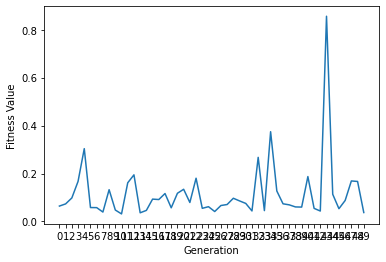

In [35]:
x_axis= list(range(len(fVal_gen)))
x_ticks = x_axis
x_labels = x_axis
fig, ax = plt.subplots(1,1)
ax.plot(x_axis, fVal_gen)

ax.xaxis.set_ticks(x_ticks)
ax.xaxis.set_ticklabels(x_labels)
plt.xlabel("Generation")
plt.ylabel("Fitness Value")
plt.show()

In [36]:
print("Fittest Generation: ", idx_max_fVal)
print("Fittest Chromosome's Fitness Value: ", max_fVal)
print("Fittest Chromosome: ", fittest_chromosome)

print("\nBest Hyperparameters found using Genetic Algorithm:")
print("Learning Rate :\t",hyperparams_learningRate[fittest_chromosome[1]])
print("Batch Size :\t",hyperparams_batchSize[fittest_chromosome[2]])
print("No of Epochs :\t",hyperparams_noEpochs[fittest_chromosome[0]])

Fittest Generation:  43
Fittest Chromosome's Fitness Value:  0.8560733065385617
Fittest Chromosome:  [2 2 0]

Best Hyperparameters found using Genetic Algorithm:
Learning Rate :	 0.01
Batch Size :	 50
No of Epochs :	 400


## Building model based on the "Best Chromosome"

By using above Hyperparameters(best Hyperparameter foudn using GA), we build a model again and train it.

In [ ]:
best_hyperparams = fittest_chromosome[:]
best_LR = hyperparams_learningRate[best_hyperparams[1]]
best_BatchSize = hyperparams_batchSize[best_hyperparams[2]]
best_noOfEpochs = hyperparams_batchSize[best_hyperparams[0]]

print("Learning Rate :\t",best_LR)
print("Batch Size :\t", best_BatchSize)
print("No of Epochs :\t",best_noOfEpochs)
print("\n")

In [30]:
model = create_model(
#       theLearningRate = best_LR
        theLearningRate = 0.01
        )

print(model.optimizer.get_config())
print("\n")

model.summary()

{'name': 'Adam', 'learning_rate': 0.01, 'decay': 0.0, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                1056      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 5,281
Trainable params: 5,281
Non-trainable params: 0
_________________________________________________________________


In [42]:
history = model.fit(
    X_test_scaled, 
    y_test_scaled, 
    epochs=400, 
    batch_size= 50,  
    
    #epochs=best_noOfEpochs, 
    #batch_size= best_BatchSize,  
    
    verbose=0, 
    validation_split=0.2) 

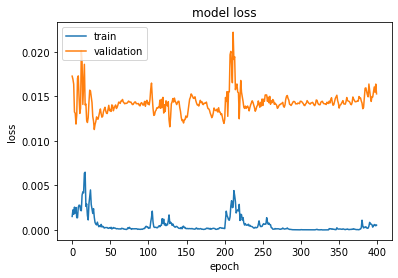

In [43]:
# print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [44]:
loss, mean_sq_e, mean_abs_e = model.evaluate(X_test_scaled, y_test_scaled)
print("Mean Squared Error : {:.5f}".format(mean_sq_e))
print("Mean Absolute Error : {:.5f}".format(mean_abs_e))

6/6 [==============================] - 0s 1ms/step - loss: 0.0036 - mse: 0.0036 - mae: 0.0346    
Mean Squared Error : 0.00363
Mean Absolute Error : 0.03461


# 6. Inference

In [49]:
predictions = model.predict(X_test_scaled)
predictions = scaler.inverse_transform(predictions)
predictions = np.round(predictions, 2)
# print("Predictions : \n", predictions)

Inference on 14th Student

In [46]:
student_index = 14
g_truth = float(y_test_np[student_index])
p = float(predictions[student_index])
print("Real Values :", g_truth)
print("Predicted G3's score is {:.2f}".format(p))
diff = np.abs(p-g_truth)
print("Difference : {:.3f}".format(diff))

Real Values : 16.0
Predicted G3's score is 15.50
Difference : 0.500


#### On Test Set/Unseen Data, manually:

In [47]:
diff_list = []

for i in range(0,len(y_test)):
    
    g_truth = float(y_test_np[i])
    p = float(predictions[i])
    diff = np.abs(p-g_truth)
    diff_list.append(diff)
    print(i)  
    print("Real Values :", g_truth)
    print("Predicted G3's score is {:.2f}".format(p))
    print("Difference : {:.3f}".format(diff))

0
Real Values : 14.0
Predicted G3's score is 14.00
Difference : 0.000
1
Real Values : 12.0
Predicted G3's score is 11.67
Difference : 0.330
2
Real Values : 10.0
Predicted G3's score is 10.05
Difference : 0.050
3
Real Values : 19.0
Predicted G3's score is 18.46
Difference : 0.540
4
Real Values : 13.0
Predicted G3's score is 12.76
Difference : 0.240
5
Real Values : 15.0
Predicted G3's score is 14.79
Difference : 0.210
6
Real Values : 10.0
Predicted G3's score is 9.91
Difference : 0.090
7
Real Values : 11.0
Predicted G3's score is 10.90
Difference : 0.100
8
Real Values : 11.0
Predicted G3's score is 10.77
Difference : 0.230
9
Real Values : 11.0
Predicted G3's score is 10.89
Difference : 0.110
10
Real Values : 15.0
Predicted G3's score is 14.66
Difference : 0.340
11
Real Values : 16.0
Predicted G3's score is 15.56
Difference : 0.440
12
Real Values : 10.0
Predicted G3's score is 9.94
Difference : 0.060
13
Real Values : 11.0
Predicted G3's score is 10.67
Difference : 0.330
14
Real Values : 1

### Mean Absolute Error after applying genetic algorithm

In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_abs_e_on_test_set = sum(diff_list) / len(y_test)
mean_abs_e_on_test_set1 = mean_absolute_error(y_test_np, predictions)
print("Mean Absolute Error : {:.5f}".format(mean_abs_e_on_test_set))

Mean Absolute Error : 0.45016


Thanks for reading!